# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [5]:
cities

['caravelas',
 'ode',
 'busselton',
 'rikitea',
 'grand gaube',
 'formosa do rio preto',
 'coihaique',
 'saint george',
 'ronneby',
 'marzuq',
 'belushya guba',
 'puerto ayora',
 'bombay',
 'anshun',
 'hobart',
 'atuona',
 'lasa',
 'attawapiskat',
 'bambous virieux',
 'klamath falls',
 'qaanaaq',
 'golspie',
 'jamestown',
 'albany',
 'kavieng',
 'lazaro cardenas',
 'tlahualilo',
 'mar del plata',
 'touros',
 'taolanaro',
 'cabo san lucas',
 'east london',
 'labutta',
 'ribeira grande',
 'guerrero negro',
 'verkhnevilyuysk',
 'illoqqortoormiut',
 'ushuaia',
 'puma',
 'puerto ayacucho',
 'rabo de peixe',
 'tuktoyaktuk',
 'farmington',
 'kapaa',
 'twin falls',
 'los llanos de aridane',
 'katangli',
 'horqueta',
 'yellowknife',
 'nizhneyansk',
 'nanortalik',
 'okakarara',
 'aranos',
 'mulki',
 'chicama',
 'kaitangata',
 'sioux lookout',
 'bur gabo',
 'geraldton',
 'tuatapere',
 'viligili',
 'samusu',
 'kamenka',
 'georgetown',
 'galiwinku',
 'chokurdakh',
 'khatanga',
 'barrow',
 'mezen',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [154]:
# Block for json

# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL based on current element in units
query_url = url + "appid=" + weather_api_key + "&q=" + city 

# Get weather data
response = requests.get(query_url)
city_json = response.json()
print(city_json)

{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.15, 'feels_like': 287.36, 'temp_min': 291.15, 'temp_max': 291.15, 'pressure': 1014, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1611722894, 'sys': {'type': 1, 'id': 8013, 'country': 'JP', 'sunrise': 1611699134, 'sunset': 1611737824}, 'timezone': 32400, 'id': 1855540, 'name': 'Naze', 'cod': 200}


In [155]:
# Pretty print block to reference while building loop code
url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')
print('-----------------------------')


# Build query URL based on current element in units
query_url = url + "appid=" + weather_api_key + "&q=" + 'caravelas' 

# Get weather data
response = requests.get(query_url).json()

pprint(response)

Beginning Data Retrieval
-----------------------------
{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': -17.7125, 'lon': -39.2481},
 'dt': 1611722894,
 'id': 3466980,
 'main': {'feels_like': 299.18,
          'grnd_level': 1015,
          'humidity': 88,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 296.56,
          'temp_max': 296.56,
          'temp_min': 296.56},
 'name': 'Caravelas',
 'sys': {'country': 'BR', 'sunrise': 1611735697, 'sunset': 1611782264},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 63, 'speed': 2.45}}


In [156]:
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Lists created for appendings API data
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
final_cities = []

# Loop header code
print('Beginning Data Retrieval')
print('-----------------------------')

# Empty counter for record number
city_count = 0

# Looping through list of cities
for city in cities:
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city 

    # Get weather data
    response = requests.get(query_url).json()
    
    city_count = city_count + 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        final_cities.append(response['name'])
        print(f"Processing Record {city_count} | {city}")

        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 | caravelas
Processing Record 2 | ode
Processing Record 3 | busselton
Processing Record 4 | rikitea
Processing Record 5 | grand gaube
Processing Record 6 | formosa do rio preto
Processing Record 7 | coihaique
Processing Record 8 | saint george
Processing Record 9 | ronneby
Processing Record 10 | marzuq
City not found. Skipping...
Processing Record 12 | puerto ayora
Processing Record 13 | bombay
Processing Record 14 | anshun
Processing Record 15 | hobart
Processing Record 16 | atuona
Processing Record 17 | lasa
City not found. Skipping...
Processing Record 19 | bambous virieux
Processing Record 20 | klamath falls
Processing Record 21 | qaanaaq
Processing Record 22 | golspie
Processing Record 23 | jamestown
Processing Record 24 | albany
Processing Record 25 | kavieng
Processing Record 26 | lazaro cardenas
City not found. Skipping...
Processing Record 28 | mar del plata
Processing Record 29 | touros
City not found.

Processing Record 252 | susangerd
Processing Record 253 | faya
Processing Record 254 | san cristobal
Processing Record 255 | whitehorse
City not found. Skipping...
Processing Record 257 | tasiilaq
Processing Record 258 | agadir
Processing Record 259 | hambantota
Processing Record 260 | omboue
Processing Record 261 | vao
Processing Record 262 | araouane
Processing Record 263 | jingdezhen
City not found. Skipping...
Processing Record 265 | kashi
Processing Record 266 | chuy
Processing Record 267 | miami
Processing Record 268 | dingle
City not found. Skipping...
Processing Record 270 | shimoda
Processing Record 271 | nokaneng
Processing Record 272 | acapulco
Processing Record 273 | bhawana
Processing Record 274 | romny
Processing Record 275 | moree
Processing Record 276 | predivinsk
Processing Record 277 | litovko
Processing Record 278 | meulaboh
Processing Record 279 | novobirilyussy
Processing Record 280 | ayagoz
City not found. Skipping...
Processing Record 282 | sri aman
City not foun

Processing Record 501 | stromness
Processing Record 502 | kaabong
Processing Record 503 | jumla
Processing Record 504 | nowy targ
Processing Record 505 | nadym
Processing Record 506 | sudak
Processing Record 507 | narsaq
City not found. Skipping...
Processing Record 509 | tungor
Processing Record 510 | solnechnyy
Processing Record 511 | beidao
Processing Record 512 | sparks
Processing Record 513 | yabrud
Processing Record 514 | champerico
Processing Record 515 | devils lake
Processing Record 516 | ulan-ude
Processing Record 517 | pareora
Processing Record 518 | vung tau
Processing Record 519 | ogaminana
Processing Record 520 | ekhabi
Processing Record 521 | dickinson
Processing Record 522 | krasnyye chetai
City not found. Skipping...
Processing Record 524 | road town
Processing Record 525 | santa maria
Processing Record 526 | viedma
Processing Record 527 | nizwa
Processing Record 528 | nueve de julio
Processing Record 529 | moerai
Processing Record 530 | dolores
Processing Record 531 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
# Created dataframe to hold city data from cities found in API
city_weather = pd.DataFrame({
    'City': final_cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date}
)
    
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,296.55,86,85,2.04,BR,1611722895
1,Ode,7.7899,5.7117,291.68,78,42,1.24,NG,1611722895
2,Busselton,-33.6500,115.3333,295.37,50,0,2.24,AU,1611722895
3,Rikitea,-23.1203,-134.9692,299.93,73,21,3.73,PF,1611722896
4,Grand Gaube,-20.0064,57.6608,301.48,67,43,0.89,MU,1611722896


In [159]:
# Summary table to review data 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.489321,17.907230,281.347252,74.853913,60.601739,3.695235,1.611723e+09
std,33.929176,90.227724,18.817499,19.160596,39.062039,2.596723,8.416787e+01
min,-54.800000,-179.166700,229.750000,15.000000,0.000000,0.110000,1.611722e+09
25%,-7.793200,-57.618350,270.150000,67.000000,20.000000,1.695000,1.611723e+09
50%,28.166700,22.401000,288.210000,79.000000,75.000000,3.020000,1.611723e+09
75%,50.456150,94.762950,296.290000,88.000000,98.000000,5.140000,1.611723e+09
max,78.218600,179.316700,312.150000,100.000000,100.000000,15.430000,1.611723e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [160]:
# No cities with humidity greater than 100
city_weather[city_weather['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Keeping starter code in case file is re-run and humidity > 100 needs removed
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [161]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,296.55,86,85,2.04,BR,1611722895
1,Ode,7.7899,5.7117,291.68,78,42,1.24,NG,1611722895
2,Busselton,-33.6500,115.3333,295.37,50,0,2.24,AU,1611722895
3,Rikitea,-23.1203,-134.9692,299.93,73,21,3.73,PF,1611722896
4,Grand Gaube,-20.0064,57.6608,301.48,67,43,0.89,MU,1611722896


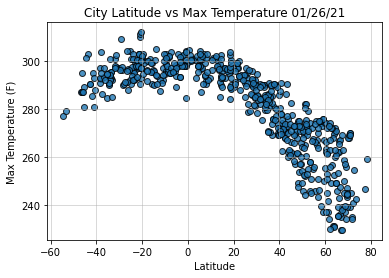

In [162]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Max Temperature 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Temp.png')

# The above plot shows the relationship between a city's latitudinal position and the maximum temperature. There seems to be a correlation between cities closer to the equator (0) and having a higher max temperature. The dataset has many more cities north of the equator.

## Latitude vs. Humidity Plot

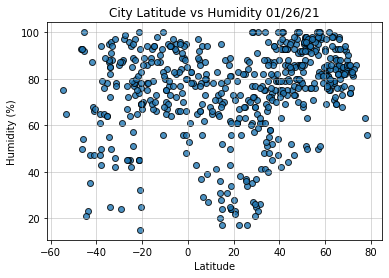

In [163]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Humidity'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Humidity 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Humidity.png')

# The above plot shows the relationship between a city's latitudinal position and the humidity. There seems to be less of a distinct correlation between a city's latitudinal position and humidity.

## Latitude vs. Cloudiness Plot

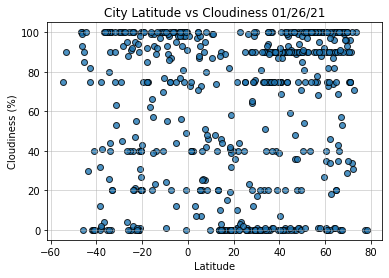

In [164]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Cloudiness 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

# The above plot shows the relationship between a city's latitudinal position and the percentage of cloud coverage. There does not seem to be a relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

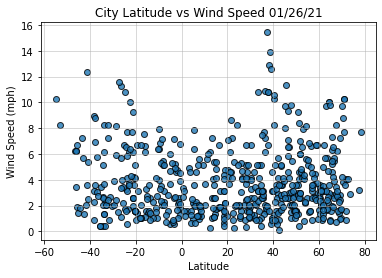

In [165]:
# Plotted graph. Added gridlines and reduced the grid line opacity slightly compared to starter code to make it easier to see data points
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], alpha = .8, edgecolors='black')
plt.title('City Latitude vs Wind Speed 01/26/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True, alpha=.6)
# plt.show()
plt.savefig('../output_data/Lat_vs_WindSpeed.png')

# The above plot shows the relationship between a city's latitudinal position and the wind speed. It seems inconclusive if there is a correlation between the two data points.

## Linear Regression

In [166]:
# Define each hemisphere for easier reference
northern_hemi = city_weather[city_weather["Lat"] > 0]
southern_hemi = city_weather[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7429804746790767


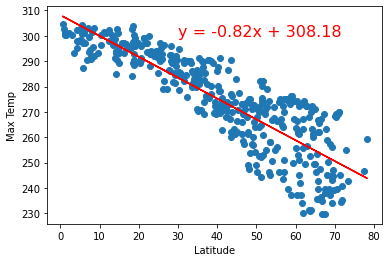

In [167]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,300),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1885615150064136


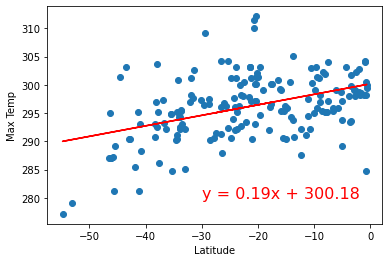

In [168]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Temp.png')

# The two plots above show the relationship between latitude and maximum temperature. The correlation is much stronger for cities in the northern hemisphere. We can tell this by the r-squared, but also by how many data points are near the regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18457147332213336


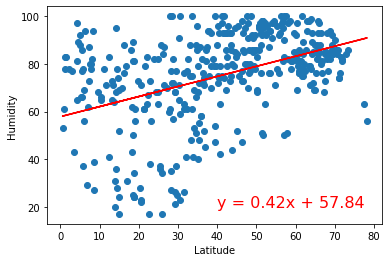

In [170]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.055402554208821245


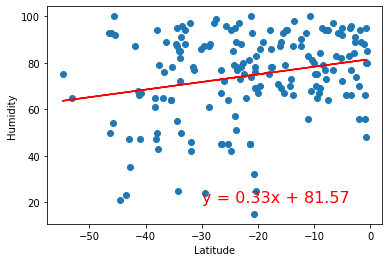

<Figure size 432x288 with 0 Axes>

In [171]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Humidity.png')

# The two plots above show the relationship between latitude and humidity. The correlation is again stronger for cities in the northern hemisphere. We can tell this by the r-squared, but also by how many data points are near the regression line – particularly in the top right quadrant of the northern hemisphere chart.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10640742555939563


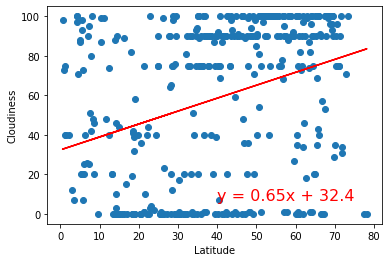

In [172]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,7),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.048466569485700134


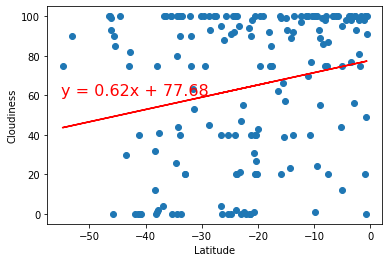

In [173]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_Cloudiness.png')

# The two plots above show the relationship between latitude and cloudiness. The r-squared is low in both models, indicating a weak correlation.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018170440621363335


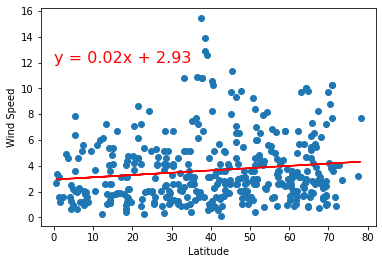

In [174]:
# Create linear regression model
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/NHem_Lat_vs_WindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.035995324709314006


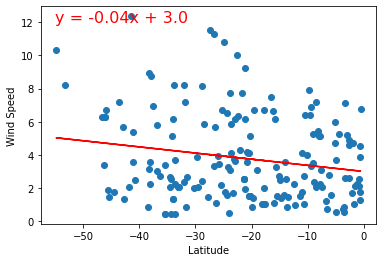

In [175]:
# Create linear regression model
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
# plt.show()
plt.savefig('../output_data/SHem_Lat_vs_WindSpeed.png')

# The two plots above show the relationship between latitude and wind speed. These are the weakest correlations, evident by the r-squared.


####  Export to csv

In [176]:
city_weather.to_csv('../output_data/cities_export.csv')